In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [11]:
sys.path.append("..")
from model.uplift_model import *
from model.roi_model import *

In [12]:
import matplotlib.pyplot as plt

def plot_loss(history, *losses):
    for loss in losses:
        plt.plot(history.history[loss], label=loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [13]:
count = 20


In [18]:
for i in range(count - 1, 16, -1):
    print(i + 1)
    

20
19
18


trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
p0_raw_features (InputLayer)    [(None, 76)]         0                                            
__________________________________________________________________________________________________
p1_hidden_1 (Dense)             (None, 64)           4928        p0_raw_features[0][0]            
__________________________________________________________________________________________________
treated_input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
reward_input (InputLayer)       [(None, 1)]          0                                     

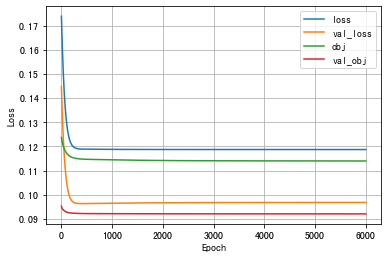

iteration =  19


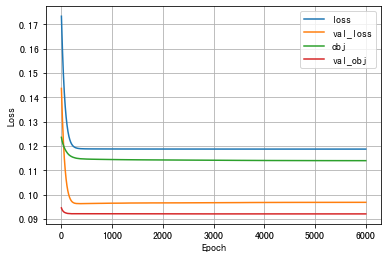

iteration =  18


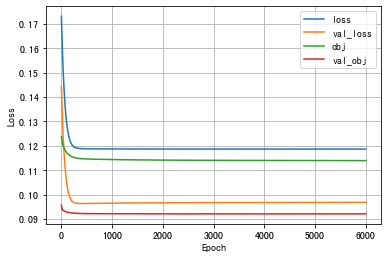

In [19]:
# UPLIFT RANK MODEL
# 7e-4
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.uplift_model import *

final_model = get_uplift_rank_model()
final_model.compile(loss=None, optimizer='adam')
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()

for i in range(count - 1, 16, -1):

    print("iteration = ", i + 1)
    
    final_model = get_uplift_rank_model()
    final_model.compile(loss=None, optimizer='adam')

    mcp_save = ModelCheckpoint('../model_file/uplift/marketing/final_model/uplift_rank_marketing_model_{}.h5'.format(i+1), save_best_only=False, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit([X, T, Yr], validation_split=0.2, epochs=6000, batch_size=4096000, shuffle=True, verbose=0, callbacks=[mcp_save])

    
    plot_loss(history, "loss", "val_loss", "obj", "val_obj")





In [ ]:
# GRF
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
from evaluation.UpliftMetric import *
import pickle


X_grf = X
T_grf = T.flatten()
Yr_grf = Yr.flatten()


for i in range(10, 20):
    
    print("iteration = ", i + 1)
    
    depth = 24
    min_samples_leaf = 300
    n_estimators = 256

    grf_random_state = 20220714 + i * 11
    
    est_it = CausalForestDML(model_y=RandomForestRegressor(n_estimators=160, max_samples = 0.7, random_state=grf_random_state, max_depth=12, min_samples_leaf=500, n_jobs=32),
                          model_t=RandomForestClassifier(n_estimators=160, max_samples = 0.7, random_state=grf_random_state, max_depth=12, min_samples_leaf=500, n_jobs=32),
                          discrete_treatment=True,
                          cv=3,
                          n_estimators=n_estimators,
                          n_jobs=32,
                          max_depth=depth,
                          min_samples_leaf = min_samples_leaf,
                          random_state=grf_random_state)

    est_it.fit(Yr_grf, T_grf, X=X_grf, cache_values=True)
    
    model_file = "../model_file/uplift/marketing/final_model/grf/CausalForestDML_{}.model".format(i + 1)
    
    fw = open(model_file, "wb")

    pickle.dump(est_it, fw)

    fw.close()
    
    print("\n")
    

iteration =  11


iteration =  12


iteration =  13


iteration =  14


iteration =  15


iteration =  16


iteration =  17


iteration =  18
